<a href="https://colab.research.google.com/github/Arthur6363/Deep-Learning-ML/blob/main/C%C4%B1far_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'cifar-10:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F3649%2F46718%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240418%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240418T100012Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D950577e8725d8a127011606a9fefb7f46096a34630946dc8c2f83d4bce96a012de6adadb7eabca28b9c10f619465cec1542138115746db25f27bfeaf3f64c7a080792a2fba9f17539f55abe51afd88a0ddaacad745aae510e46676a780839c835856202e2db9ed831f025548e73740caa6e5632fed60174b7fd46fda7977613bc0eb071ed84a18ea57e6672b88fcfa143e6a52ae30fab4badad2dba4828de3435585884eb1dcaee244527e37394f5b44e8e6a4a5b0d76afc6cfd1e88ea194ffe09cabab47dfac706f2830297b7baaf4dfabcf348cf94b4a3048897c58533fe28b35f316c5153678bd34bca469580976c3a4602ac34993b39751918372950632f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test,y_test), = datasets.cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [ ]:
y_test=y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
siniflar=["uçak","otomobil","kuş","kedi","geyik","köpek","kurbağa","at","gemi","kamyon"]

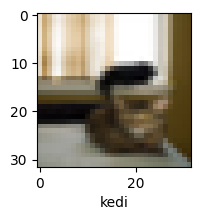

In [ ]:
def ornek(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(siniflar[y[index]])
ornek(x_test,y_test,63)

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train, epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.3369 - loss: 1.7954
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5689 - loss: 1.2239
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.6265 - loss: 1.0599
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6618 - loss: 0.9754
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6809 - loss: 0.9115
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7019 - loss: 0.8614
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7135 - loss: 0.8238
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7264 - loss: 0.7934
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7385 - loss: 0.7550
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7473 - loss: 0.7341
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7521 - loss: 0.7151
Epoch 12

In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7034 - loss: 0.9265


[0.9323089718818665, 0.7024999856948853]

In [ ]:
y_pred = model.predict(x_test)
y_pred[:3]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[2.1154896e-05, 1.1777813e-06, 1.2440066e-04, 6.4359295e-01,
        2.2245986e-05, 3.5352170e-01, 1.4248514e-03, 1.2424462e-06,
        1.2795351e-03, 1.0708733e-05],
       [5.3126173e-04, 2.0118390e-01, 1.4602837e-07, 4.7019864e-07,
        2.0092060e-07, 4.4068069e-09, 4.2223931e-07, 1.7673205e-11,
        7.9747385e-01, 8.0975599e-04],
       [4.4182234e-02, 7.3164415e-01, 8.9991483e-04, 9.5054304e-04,
        2.3681114e-03, 4.9983802e-05, 4.3079999e-04, 3.5156998e-05,
        1.3403209e-01, 8.5407078e-02]], dtype=float32)

In [ ]:
y_pred1= [np.argmax(element) for element in y_pred]
y_pred1[:3]

[3, 8, 1]

In [ ]:
y_test[:3]

array([3, 8, 8], dtype=uint8)

In [ ]:
y_pred1[:10]

[3, 8, 1, 0, 6, 6, 1, 6, 4, 9]

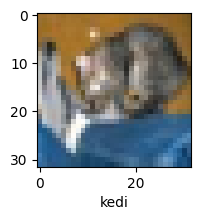

In [ ]:
ornek(x_test, y_test, 0)

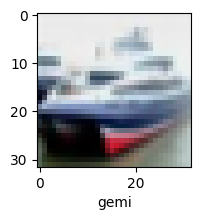

In [ ]:
ornek(x_test, y_test, 1)